In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
# Calculate Precision, Recall, Specificity, and F1-Score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 
from sklearn.model_selection import GridSearchCV, train_test_split 
from imblearn.over_sampling import SMOTE




Reading and showing the data from CSV

In [7]:
data = pd.read_csv('./brain_stroke.csv')
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


Data Breif Information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [10]:

l1=LabelEncoder()
data["Residence_type"]=l1.fit_transform(data["Residence_type"])
data["smoking_status"]=l1.fit_transform(data["smoking_status"])
data["ever_married"]=l1.fit_transform(data["ever_married"])
data["work_type"]=l1.fit_transform(data["work_type"])
data["gender"]=l1.fit_transform(data["gender"])
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [11]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
5,1,74.0,1,1,1,1,0,70.09,27.4,2,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1
7,0,78.0,0,0,1,1,1,58.57,24.2,0,1
8,0,81.0,1,0,1,1,0,80.43,29.7,2,1
9,0,61.0,0,1,1,0,0,120.46,36.8,3,1


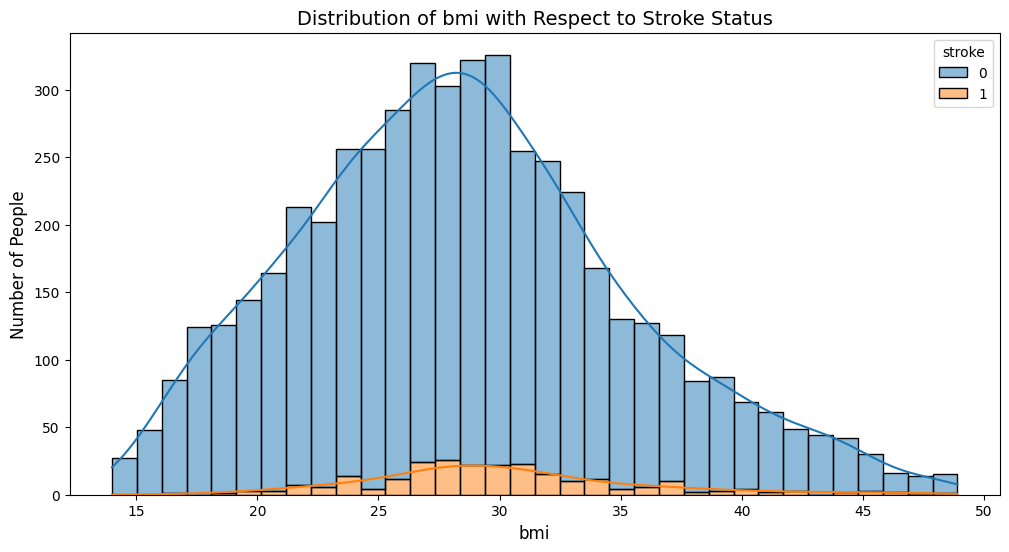

In [12]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram with Seaborn's histplot
sns.histplot(data=data, x='bmi', hue='stroke', multiple='stack', kde=True, palette=["#1f77b4", "#ff7f0e"])

# Add labels and title
plt.title('Distribution of bmi with Respect to Stroke Status', fontsize=14)
plt.xlabel('bmi', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Show the plot
plt.savefig('fig01.png',dpi=300)
plt.show()

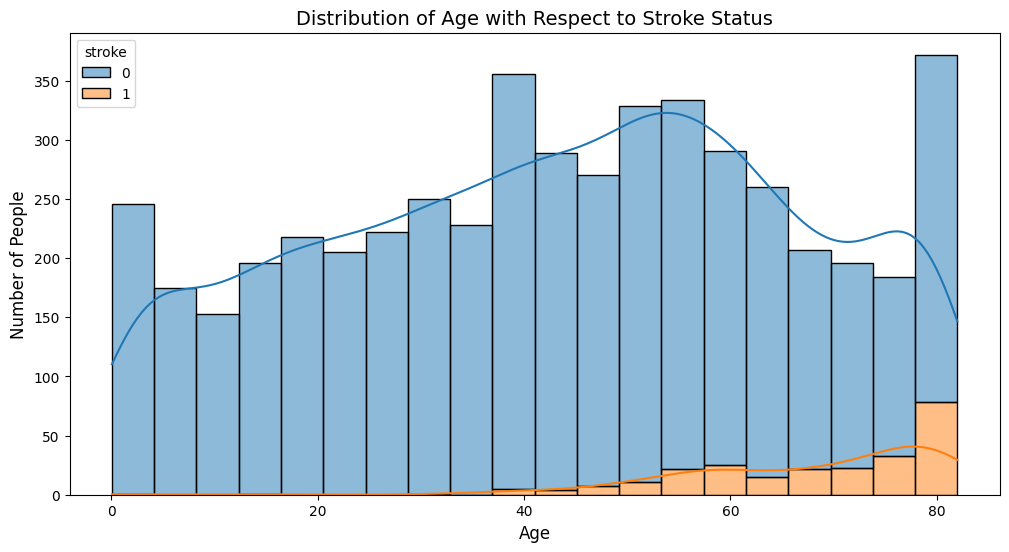

In [13]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram with Seaborn's histplot
sns.histplot(data=data, x='age', hue='stroke', multiple='stack', kde=True, palette=["#1f77b4", "#ff7f0e"])

# Add labels and title
plt.title('Distribution of Age with Respect to Stroke Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Show the plot
plt.savefig('fig02.png',dpi=300)
plt.show()

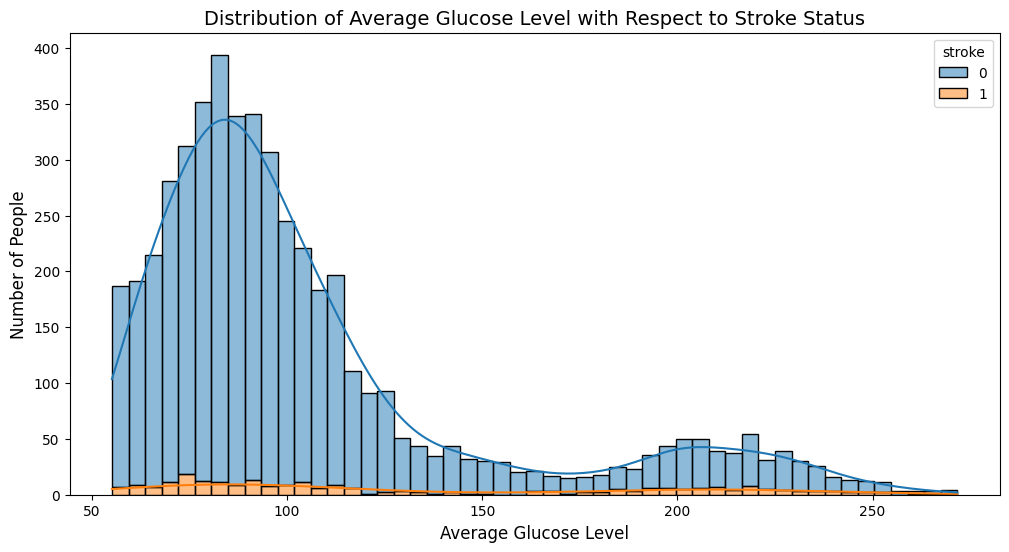

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='avg_glucose_level', hue='stroke', multiple='stack', kde=True, palette=["#1f77b4", "#ff7f0e"])
plt.title('Distribution of Average Glucose Level with Respect to Stroke Status', fontsize=14)
plt.xlabel('Average Glucose Level', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.savefig('fig03.png', dpi=300)
plt.show()


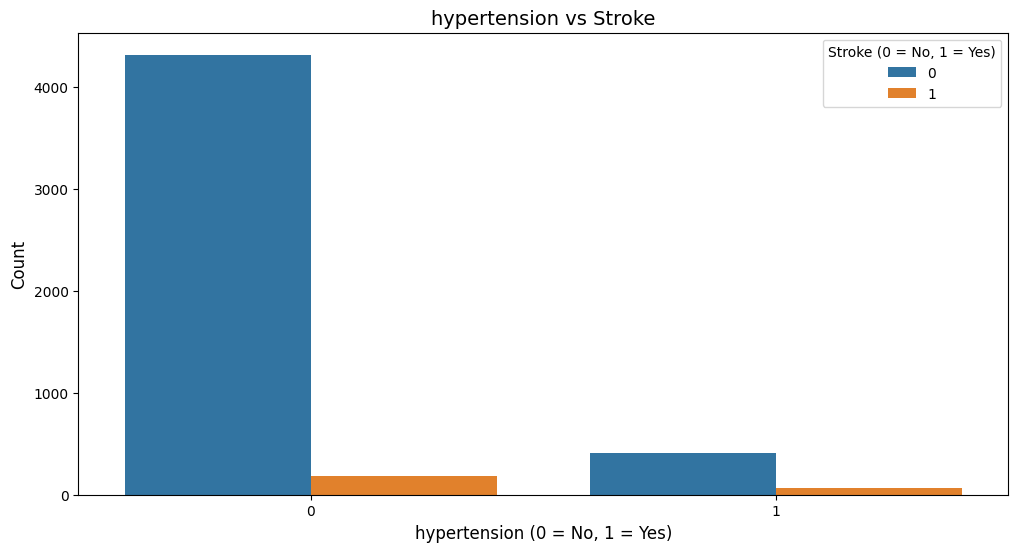

In [15]:
# Set the figure size for readability
plt.figure(figsize=(12, 6))

# Create the bar chart with Seaborn's countplot
sns.countplot(data=data, x='hypertension', hue='stroke', palette=["#1f77b4", "#ff7f0e"])


# Add labels and title
plt.title('hypertension vs Stroke', fontsize=14)
plt.xlabel('hypertension (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.legend(title='Stroke (0 = No, 1 = Yes)')
plt.savefig('fig04.png',dpi=300)
plt.show()

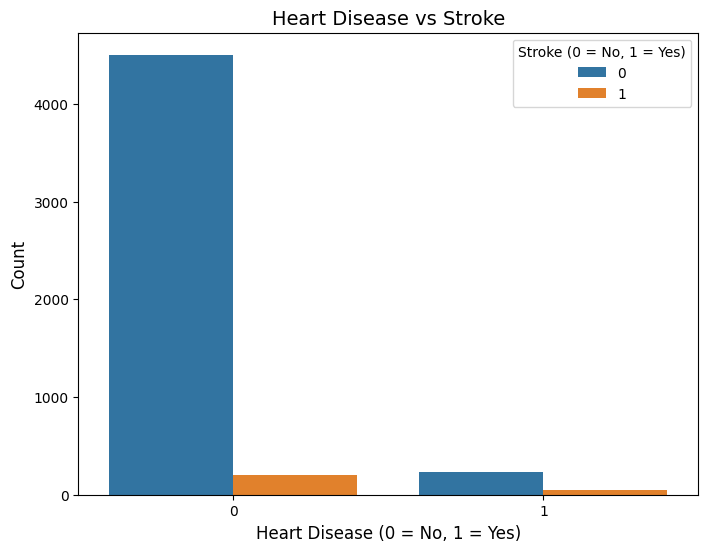

In [16]:
# Set the figure size for readability
plt.figure(figsize=(8, 6))

# Create the bar chart with Seaborn's countplot
sns.countplot(data=data, x='heart_disease', hue='stroke', palette=["#1f77b4", "#ff7f0e"])


# Add labels and title
plt.title('Heart Disease vs Stroke', fontsize=14)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.legend(title='Stroke (0 = No, 1 = Yes)')
plt.savefig('fig05.png',dpi=300)
plt.show()

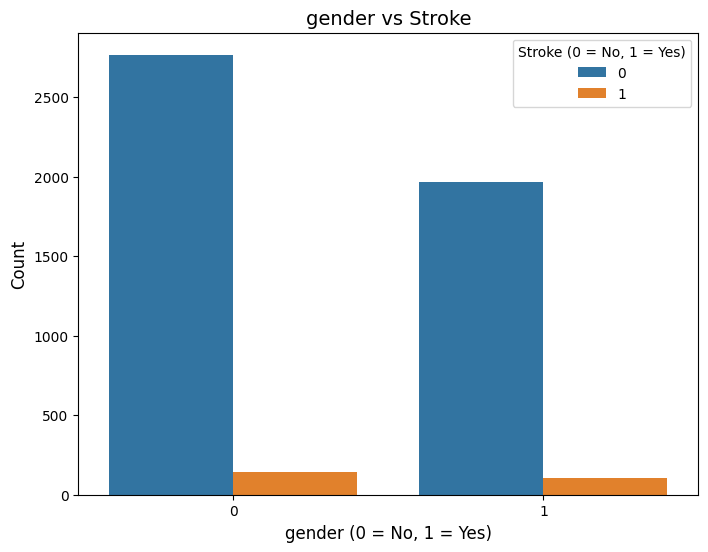

In [17]:
# Set the figure size for readability
plt.figure(figsize=(8, 6))

# Create the bar chart with Seaborn's countplot
sns.countplot(data=data, x='gender', hue='stroke', palette=["#1f77b4", "#ff7f0e"])


# Add labels and title
plt.title('gender vs Stroke', fontsize=14)
plt.xlabel('gender (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.legend(title='Stroke (0 = No, 1 = Yes)')
plt.savefig('fig06.png',dpi=300)
plt.show()

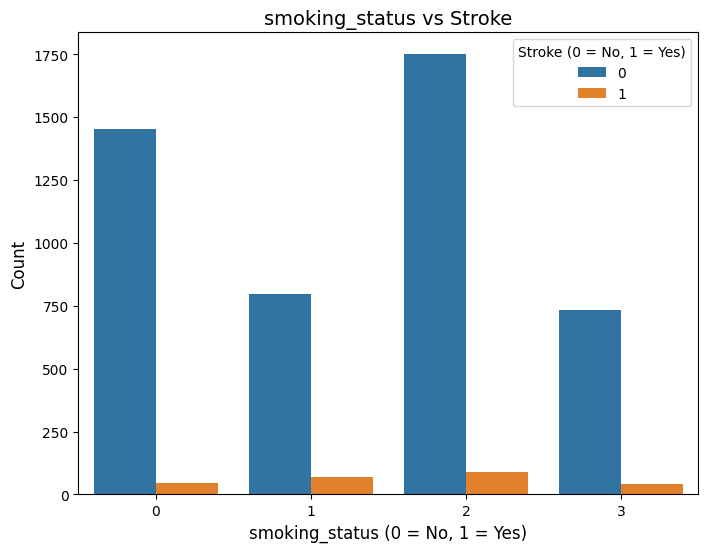

In [18]:
# Set the figure size for readability
plt.figure(figsize=(8, 6))

# Create the bar chart with Seaborn's countplot
sns.countplot(data=data, x='smoking_status', hue='stroke', palette=["#1f77b4", "#ff7f0e"])


# Add labels and title
plt.title('smoking_status vs Stroke', fontsize=14)
plt.xlabel('smoking_status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.legend(title='Stroke (0 = No, 1 = Yes)')
plt.savefig('fig07.png',dpi=300)
plt.show()


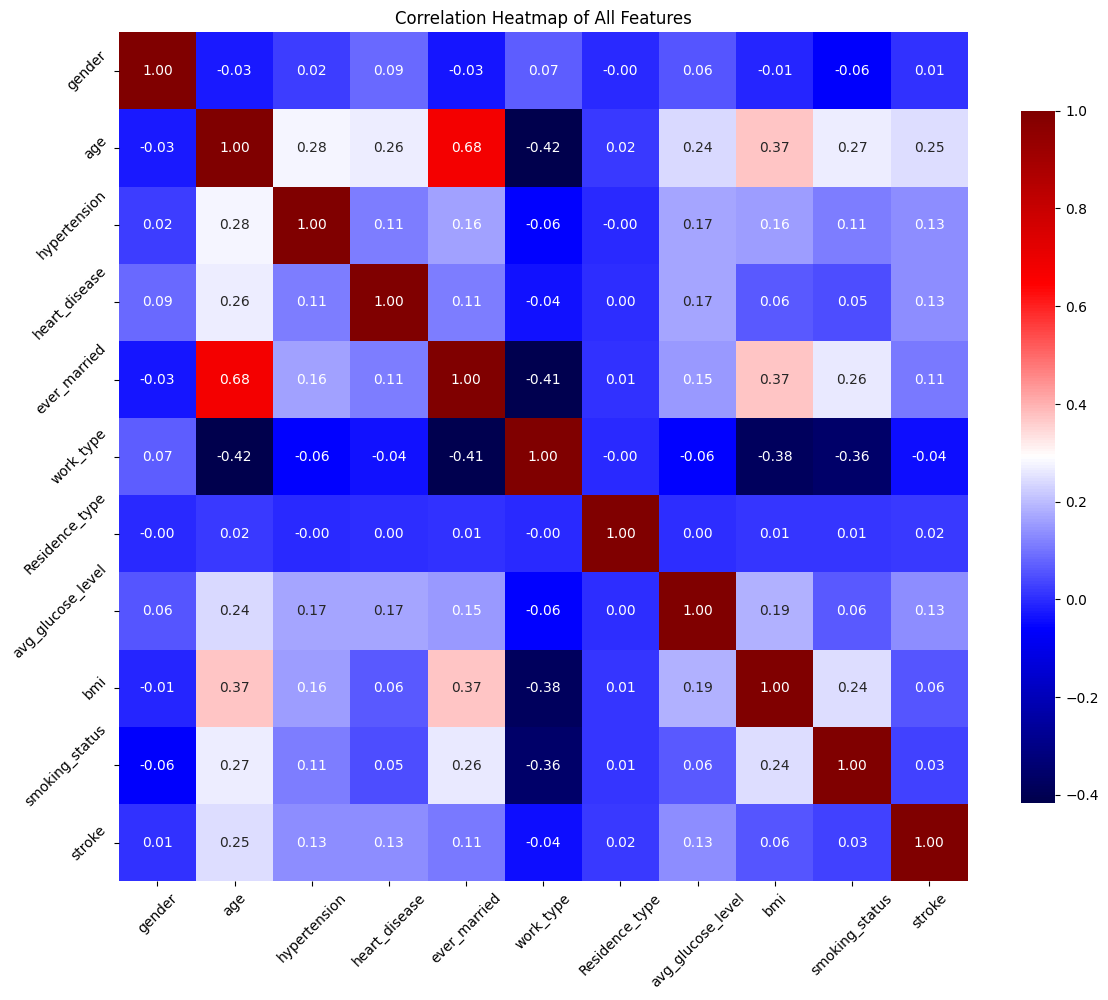

In [19]:
# Select numerical columns for the heatmap (if there are categorical columns, we need to convert them)
# Get numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# If you want to visualize categorical features as well, you can use OneHotEncoding or LabelEncoding

# Check for any categorical columns and encode them
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
if categorical_columns:
    # Use OneHotEncoder to convert categorical features into numerical features
    encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)
    # Concatenate the original numerical data with the encoded categorical data
    full_data = pd.concat([numerical_data, encoded_data], axis=1)
else:
    full_data = numerical_data  # If no categorical data, just use numerical data

# Calculate the correlation matrix for all features
correlation_matrix = full_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='seismic', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap of All Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

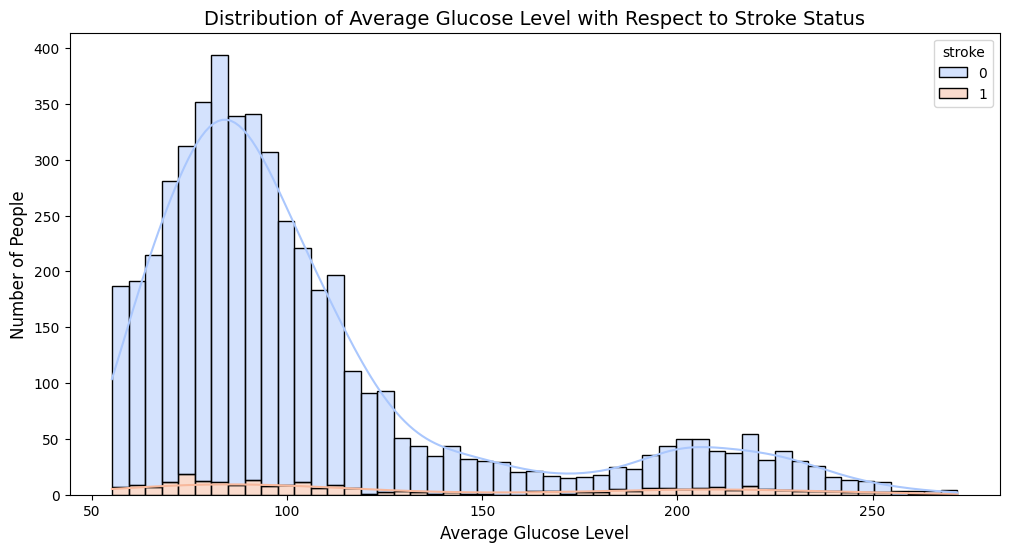

In [20]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram with Seaborn's histplot
sns.histplot(data=data, x='avg_glucose_level', hue='stroke', multiple='stack', kde=True, palette='coolwarm')

# Add labels and title
plt.title('Distribution of Average Glucose Level with Respect to Stroke Status', fontsize=14)
plt.xlabel('Average Glucose Level', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Show the plot
plt.show()


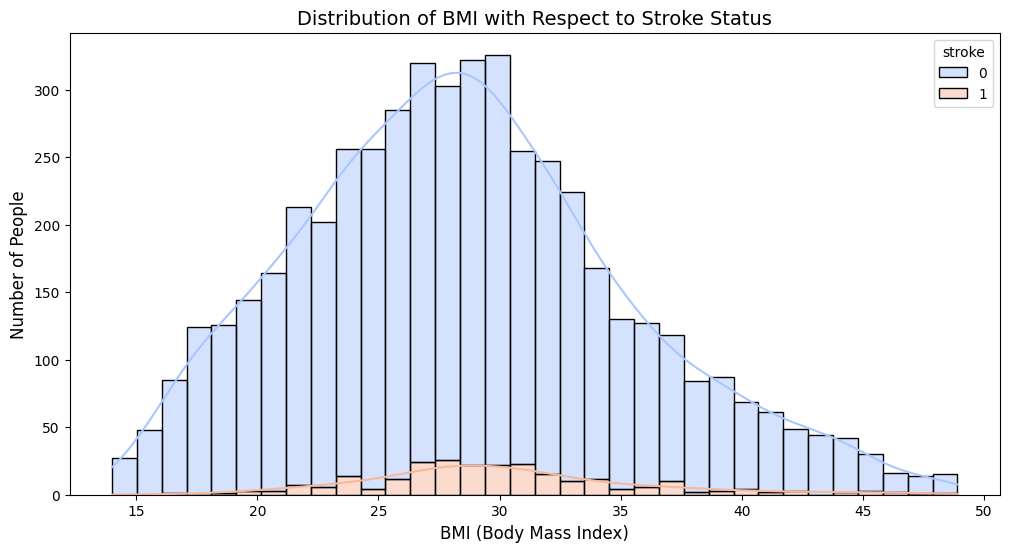

In [21]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram with Seaborn's histplot
sns.histplot(data=data, x='bmi', hue='stroke', multiple='stack', kde=True, palette='coolwarm')

# Add labels and title
plt.title('Distribution of BMI with Respect to Stroke Status', fontsize=14)
plt.xlabel('BMI (Body Mass Index)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Show the plot
plt.show()


Showing that data is balanced or not

In [22]:
stroke_counts = data.groupby('heart_disease')['stroke'].value_counts().unstack()
print(stroke_counts)

stroke            0    1
heart_disease           
0              4505  201
1               228   47


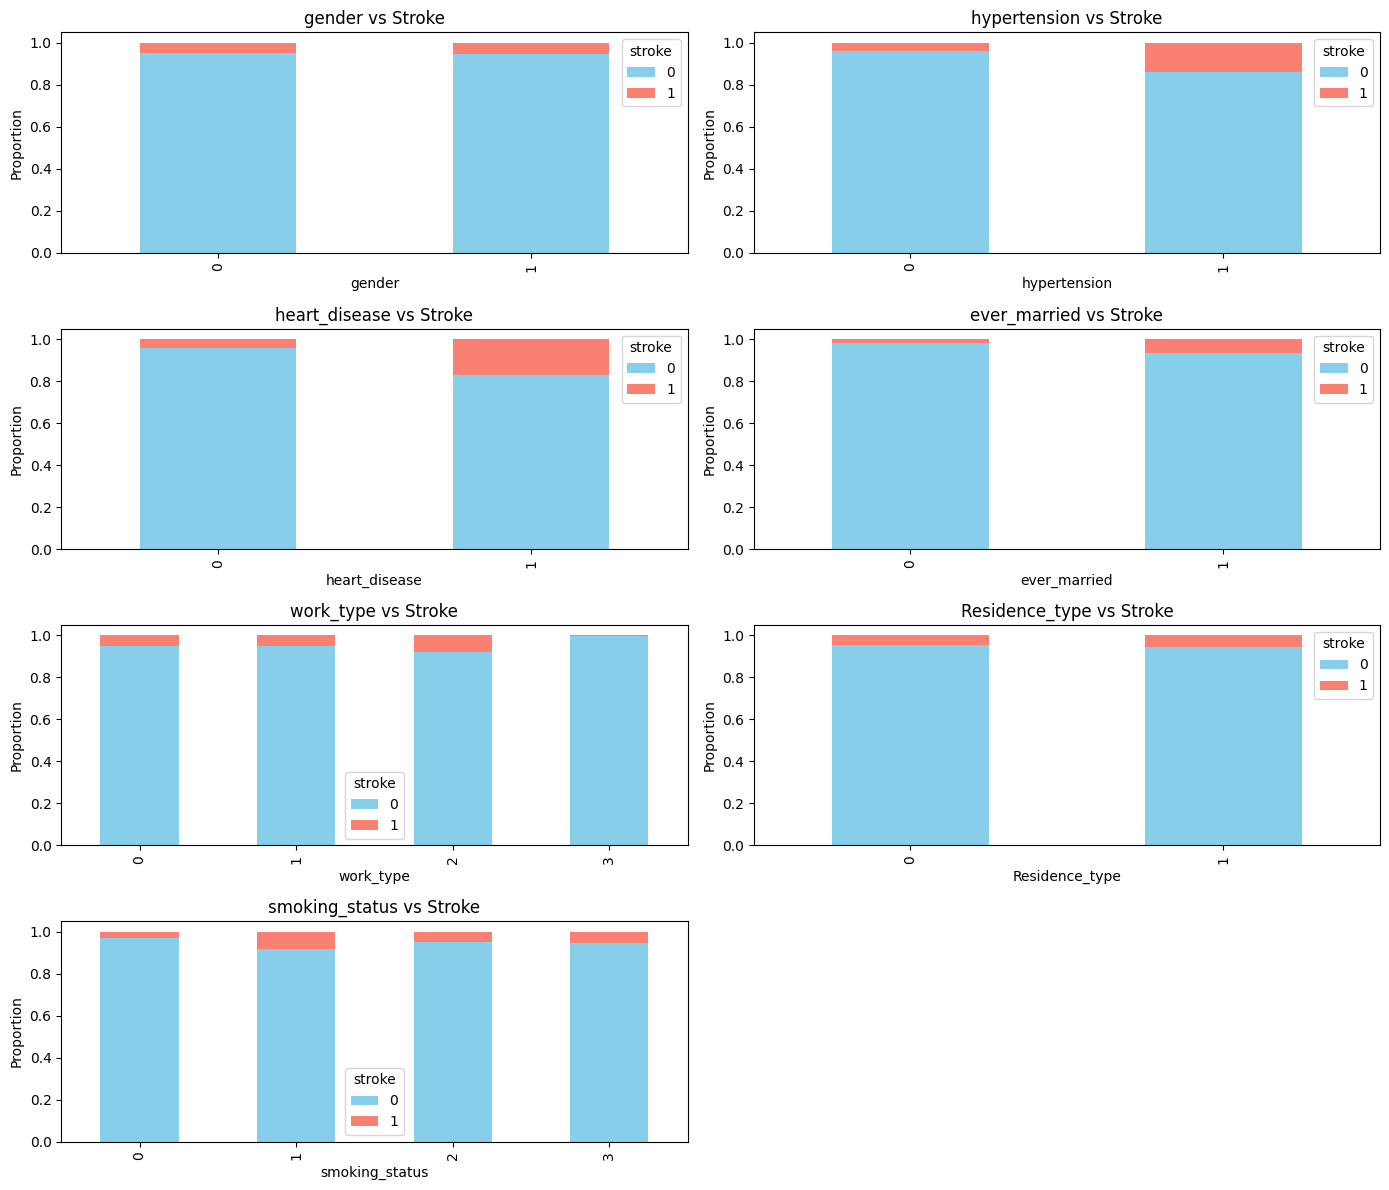

In [23]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set up a figure for subplots
plt.figure(figsize=(14, 12))

# Loop through each categorical column and plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    prop_df = data.groupby([col, 'stroke']).size().unstack()  # Get proportions for each stroke category
    prop_df.div(prop_df.sum(1), axis=0).plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])
    plt.title(f'{col} vs Stroke')
    plt.ylabel('Proportion')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Show the converted labels using LabelEncoder function to its associated column name

In [24]:
# Sample data
data_column = ['Govt_job', 'Private', 'Self-employed', 'children']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_labels = label_encoder.fit_transform(data_column)

# Display the original data and their corresponding encoded labels
for original, encoded in zip(data_column, encoded_labels):
    print(f'Original: {original}, Encoded: {encoded}')

# To see the mapping of each unique label to its corresponding number
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('\nLabel Mapping:')
for label, number in label_mapping.items():
    print(f'{label} -> {number}')


Original: Govt_job, Encoded: 0
Original: Private, Encoded: 1
Original: Self-employed, Encoded: 2
Original: children, Encoded: 3

Label Mapping:
Govt_job -> 0
Private -> 1
Self-employed -> 2
children -> 3


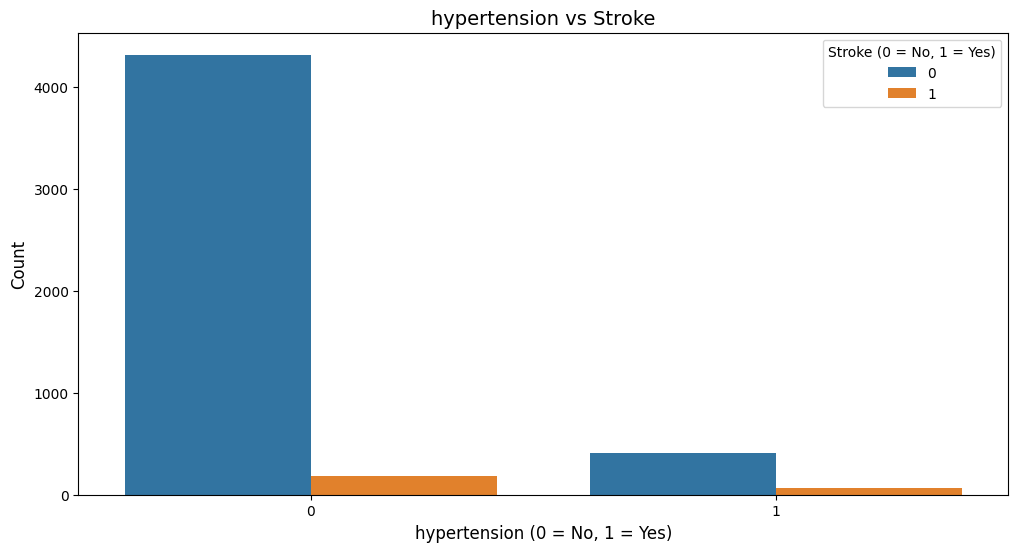

In [25]:
# Set the figure size for readability
plt.figure(figsize=(12, 6))

# Create the bar chart with Seaborn's countplot
sns.countplot(data=data, x='hypertension', hue='stroke', palette=["#1f77b4", "#ff7f0e"])


# Add labels and title
plt.title('hypertension vs Stroke', fontsize=14)
plt.xlabel('hypertension (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.legend(title='Stroke (0 = No, 1 = Yes)')
plt.savefig('fig08.png',dpi=300)
plt.show()

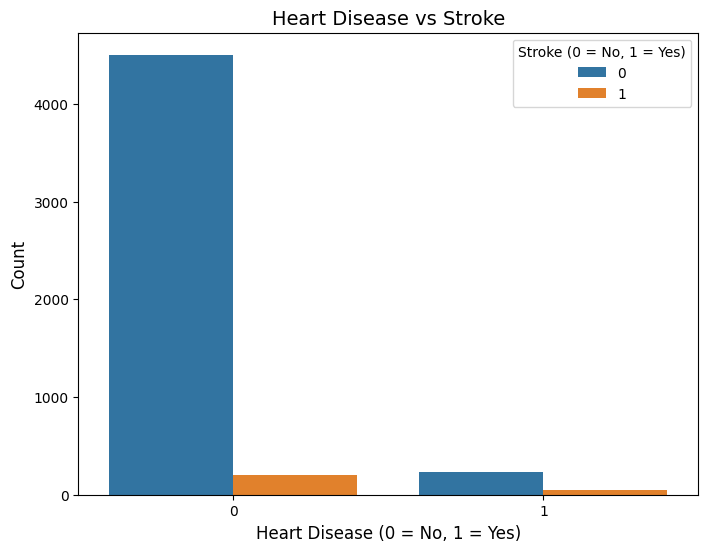

In [26]:

# Set the figure size for readability
plt.figure(figsize=(8, 6))

# Create the bar chart with Seaborn's countplot
sns.countplot(data=data, x='heart_disease', hue='stroke', palette=["#1f77b4", "#ff7f0e"])


# Add labels and title
plt.title('Heart Disease vs Stroke', fontsize=14)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.legend(title='Stroke (0 = No, 1 = Yes)')
plt.savefig('fig09.png',dpi=300)
plt.show()


Checking the unbalancy of the data

In [27]:
data["stroke"].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

Splitting the data set to features and the goal (brain stroke)

In [28]:
X = data.drop('stroke', axis=1)  # Drop the target column ('stroke')
y = data['stroke']  # Target variable

Balancing Techniques

The brain stroke dataset  has a significant imbalance between the number of stroke cases (minority class) and non-stroke cases (majority class). This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. SMOTE helps to balance the dataset by creating synthetic samples for the minority class, which can improve the performance of machine learning models on imbalanced datasets. This is particularly useful in scenarios where the minority class is underrepresented and the model might otherwise be biased towards the majority class.

In [29]:
s=SMOTE()
x_data,y_data=s.fit_resample(X,y)

In [30]:
from collections import Counter #Check whether data is properaly balanced or not
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


Split the data set to tain and test via sklearn.model_selection function

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

Check and see whether the data set is balance after appying SMOTE() function

In [32]:
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


apply StandardScaler function to standerize the dataset

In [33]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train[['age', 'bmi', 'avg_glucose_level']] = scaler.fit_transform(X_train[['age', 'bmi', 'avg_glucose_level']])
X_test[['age', 'bmi', 'avg_glucose_level']] = scaler.transform(X_test[['age', 'bmi', 'avg_glucose_level']])

# Check the scaled values
print(X_train[['age', 'bmi', 'avg_glucose_level']].head())
print(X_test[['age', 'bmi', 'avg_glucose_level']].head())

           age       bmi  avg_glucose_level
4315 -0.668674  0.221186          -0.435785
4775 -1.329915 -1.461854          -0.058519
2711 -0.800922  0.442639          -0.500977
4533 -1.285832 -0.487463          -0.130432
1425 -0.889088  0.029260           0.469967
           age       bmi  avg_glucose_level
1861  1.138717  0.235949           2.767167
2016 -1.065419  0.516456          -0.743153
3539  0.301146  0.929834          -0.369920
4108  0.080732  0.531220           0.153637
4829 -0.007433  0.206422           0.038710


Apply Logestic Regression

Confusion Matrix:
 [[947   0]
 [ 50   0]]
Training-set accuracy score: 0.9503012048192772
Test-set accuracy score: 0.9498495486459378
Test Accuracy (calculated manually): 0.9498495486459378
Precision: 1.0
Recall: 0.0
Specificity: 1.0
F1 Score: 0.0
Score: 0.9498495486459378


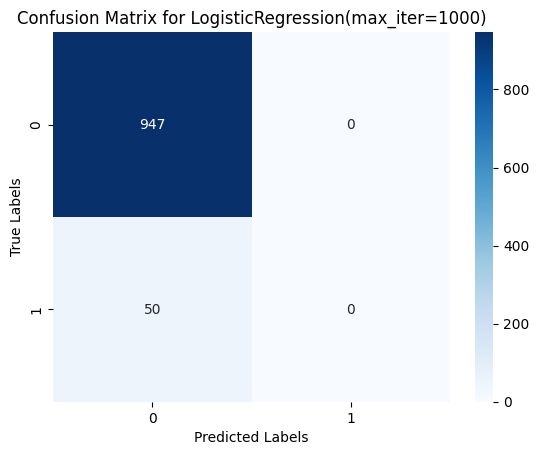

In [34]:
# Initialize the Logistic Regression model and fit it on the training data
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test data
lr_pred = lr.predict(X_test)

# Display the confusion matrix as text
cm = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:\n", cm)

# Calculate and display accuracy scores for both training and test sets
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Training-set accuracy score:', train_accuracy)
print('Test-set accuracy score:', test_accuracy)

# Alternative method to calculate test accuracy score
acc_log_clf = accuracy_score(y_test, lr_pred)
print("Test Accuracy (calculated manually):", acc_log_clf)

# Calculate precision, recall, specificity, and F1-score with zero_division parameter
precision = precision_score(y_test, lr_pred, zero_division=1)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)

# Specificity calculation
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1}')

# List of models to evaluate (useful if you have multiple models)
pred_list = [lr]

# Loop to print scores and plot confusion matrices for each model
for model in pred_list:
    print("Score:", model.score(X_test, y_test))
    
    # Generate and plot the confusion matrix
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model}")
    plt.savefig('fig8.png', dpi=300)
    plt.show()


The model seems to predict "No Stroke" (0) well, but it fails to predict "Stroke" (1) at all. There are 50 false negatives but no true positives, which means the model never correctly predicted a stroke. So for the next step we use LogisticRegression with class_weight as 'balanced'

For the below model we use RFE to select the most important features, it can be selected via n_features_to_select, 5 for this example

Selected Features: Index(['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level'],
      dtype='object')


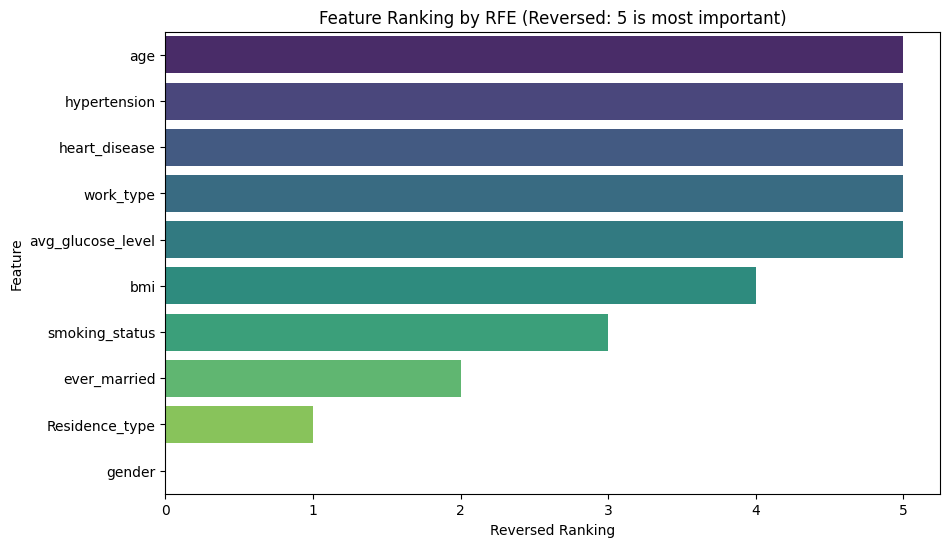

Confusion Matrix with adjusted threshold (RFE features):
 [[500 447]
 [  4  46]]
Training-set accuracy score with RFE: 0.7344377510040161
Testing-set accuracy score with RFE: 0.7191574724172518
Test Accuracy with adjusted threshold (RFE): 0.5476429287863591


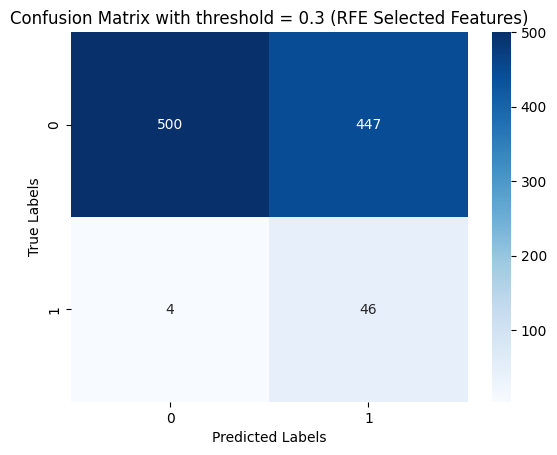

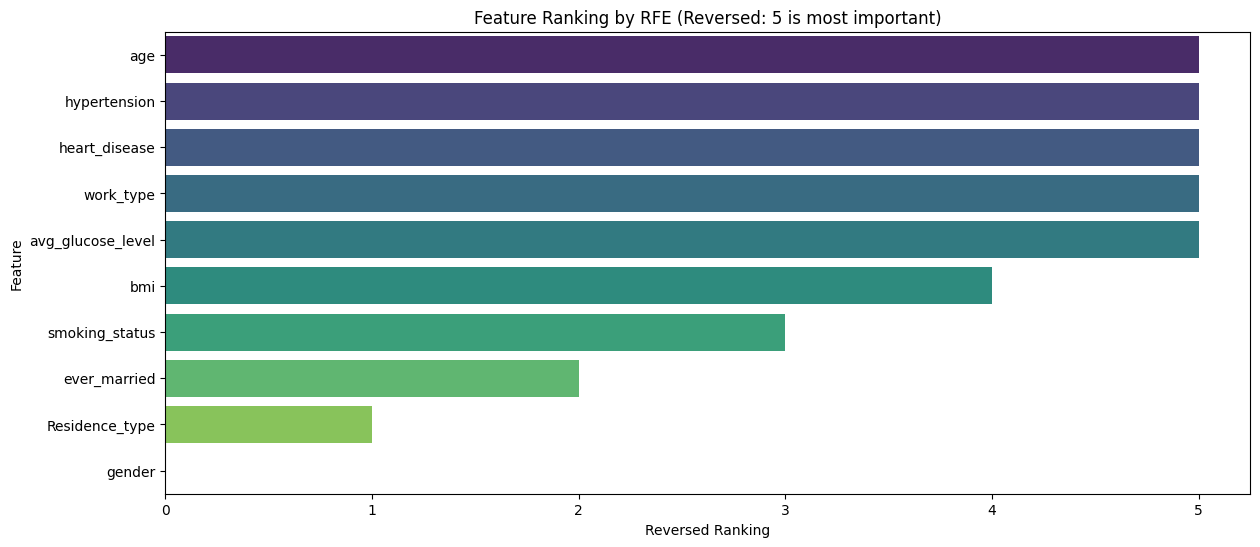

Precision: 0.09330628803245436
Recall: 0.92
Specificity: 0.5279831045406547
F1-Score: 0.1694290976058932


In [35]:
# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=3, max_iter=1000, class_weight='balanced')

# Use RFE to select the most important features
n_features_to_select = 5  # Example: select 5 features
rfe = RFE(estimator=log_reg, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Reverse the ranking, so the highest rank (5) is the most important
max_rank = n_features_to_select  # The maximum ranking number
reversed_ranking = max_rank - rfe.ranking_ + 1

# Create a DataFrame with the feature names, their original ranking, and the new reversed ranking
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Original Ranking': rfe.ranking_,
    'Reversed Ranking': reversed_ranking,
    'Selected': rfe.support_
})

# Sort features based on their new reversed rank (higher value is more important)
feature_ranking_sorted = feature_ranking.sort_values(by='Reversed Ranking', ascending=False)

# Visualize the feature importance ranking with reversed ranking
plt.figure(figsize=(10, 6))
sns.barplot(x='Reversed Ranking', y='Feature', data=feature_ranking_sorted, palette='viridis', hue='Feature', dodge=False)
plt.title(f'Feature Ranking by RFE (Reversed: {max_rank} is most important)')
plt.xlabel('Reversed Ranking')
plt.ylabel('Feature')
plt.legend([],[], frameon=False)  # Disable the legend
plt.show()

# Train a new Logistic Regression model using only the selected features
log_reg_rfe = LogisticRegression(random_state=3, max_iter=1000, class_weight='balanced')
log_reg_rfe.fit(X_train[selected_features], y_train)

# Predict on the test set using only the selected features
y_probs_rfe = log_reg_rfe.predict_proba(X_test[selected_features])[:, 1]

# Set a new threshold for prediction (e.g., 0.3 for more sensitivity)
threshold = 0.3
y_pred_adjusted_rfe = (y_probs_rfe >= threshold).astype(int)

# Display the confusion matrix for the adjusted predictions
cm_rfe = confusion_matrix(y_test, y_pred_adjusted_rfe)
print("Confusion Matrix with adjusted threshold (RFE features):\n", cm_rfe)

# Calculate and display accuracy scores for both training and test sets with selected features
train_accuracy_rfe = log_reg_rfe.score(X_train[selected_features], y_train)
test_accuracy_rfe = log_reg_rfe.score(X_test[selected_features], y_test)
print('Training-set accuracy score with RFE:', train_accuracy_rfe)
print('Testing-set accuracy score with RFE:', test_accuracy_rfe)

# Test accuracy with adjusted threshold (calculated manually)
acc_log_clf_rfe = accuracy_score(y_test, y_pred_adjusted_rfe)
print("Test Accuracy with adjusted threshold (RFE):", acc_log_clf_rfe)

# Generate and plot the confusion matrix for adjusted predictions with selected features
sns.heatmap(cm_rfe, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix with threshold = {threshold} (RFE Selected Features)")

# Visualize the feature importance ranking with reversed ranking
plt.figure(figsize=(14, 6))
sns.barplot(x='Reversed Ranking', y='Feature', data=feature_ranking_sorted, palette='viridis', hue='Feature', dodge=False)
plt.title(f'Feature Ranking by RFE (Reversed: {max_rank} is most important)')
plt.xlabel('Reversed Ranking')
plt.ylabel('Feature')
plt.legend([],[], frameon=False)  # Disable the legend

# Save the plot as 'reversed_ranking.png' with 300 DPI resolution
plt.savefig('reversed_ranking.png', dpi=300)  # <-- Save the figure here

# Display the plot
plt.show()


precision = precision_score(y_test, y_pred_adjusted_rfe)
recall = recall_score(y_test, y_pred_adjusted_rfe)
f1 = f1_score(y_test, y_pred_adjusted_rfe)

# Specificity = TN / (TN + FP)
tn, fp, fn, tp = cm_rfe.ravel()  # Extract values from the confusion matrix
specificity = tn / (tn + fp)

# Print the calculated metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1-Score: {f1}")


Confusion Matrix with adjusted threshold:
 [[500 447]
 [  3  47]]
Training-set accuracy score: 0.7374497991967871
Test-set accuracy score: 0.7131394182547643
Test Accuracy (calculated manually): 0.5486459378134403


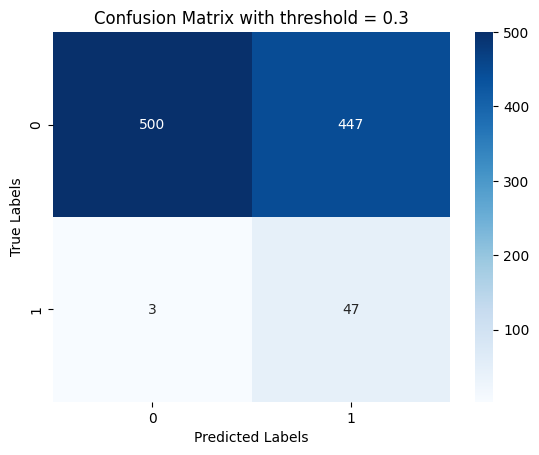

In [36]:

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(random_state=3, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Get the predicted probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (stroke)

# Set a new threshold (e.g., 0.3 for more sensitivity)
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)  # Classify as 1 (stroke) if probability is >= threshold

# Display the confusion matrix for the adjusted predictions
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix with adjusted threshold:\n", cm)

# Calculate and display accuracy scores for both training and test sets
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)
print('Training-set accuracy score:', train_accuracy)
print('Test-set accuracy score:', test_accuracy)

# Test accuracy (calculated manually)
acc_log_clf = accuracy_score(y_test, y_pred_adjusted)
print("Test Accuracy (calculated manually):", acc_log_clf)

# Generate and plot the confusion matrix for adjusted predictions
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix with threshold = {threshold}")
plt.show()
